# <font color = 'black'> Análise exploratória de dados de assiduidade em consultas na cidade de Vitória - ES. </font> 


#   <font color = 'blue'> Grupo 1: </font> 
* Aline Carvalho
* Camila Bianca
* Felipe Cunha
* Ivan Felipe 
* Mateus Brito
* Vinícius Peixoto

# <font color = 'blue'> Dicionário de Dados: </font> 

## Este conjunto de dados contém informações sobre as consultas médicas marcadas em clínicas no Brasil e se os pacientes compareceram ou não às consultas.

### O conjunto de dados inclui as seguintes colunas:

* PatientId: identificador único do paciente
* AppointmentID: identificador único da consulta
* Gender: gênero do paciente (Feminino/Masculino)
* ScheduledDay: data em que a consulta foi marcada
* AppointmentDay: data da consulta
* Age: idade do paciente
* Neighbourhood: nome do bairro onde a consulta ocorrerá
* Scholarship: indica se o paciente faz parte do programa Bolsa Família (0 = não, 1 = sim)
* Hipertension: indica se o paciente tem hipertensão (0 = não, 1 = sim)
* Diabetes: indica se o paciente tem diabetes (0 = não, 1 = sim)
* Alcoholism: indica se o paciente tem problemas com álcool (0 = não, 1 = sim)
* Handcap: indica se o paciente é deficiente (0 = não, 1 = sim)
* SMS_received: indica se o paciente recebeu uma mensagem de lembrete da consulta (0 = não, 1 = sim)
* No-show: indica se o paciente compareceu à consulta (No = sim, Yes = não)

##  <font color = 'blue'>Perguntas a serem respondidas:  </font>
### Ação combativa
- Qual o impacto do recebimento do SMS em cada grupo?
  - Geral 
  - Problemas de saúde
  - Idade
  - PCD

### Ação paliativa
- Qual a faixa etária mais assídua e a mais ausente? 
- Qual(is) o(s) bairro(s) de pessoas menos assíduas? 
- Quais os problemas de saúde das pessoas menos assíduas? 
- intervalo de tempo entre o dia da marcação e o dia da consulta em si.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_excel('appointment_prediction_data.xlsx')

In [4]:
df['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)

df.rename(columns={'No-show': 'Compareceu'}, inplace=True)

df['Gender'].replace({'Female':'F','Male':'M'}, inplace=True)

df['Neighbourhood'].replace({'RESIST√äNCIA':'RESISTÊNCIA','REP√öBLICA':'REPÚBLICA','S√ÉO PEDRO':'SÃO PEDRO',
                             'S√ÉO CRIST√ìV√ÉO':'SÃO CRISTÓVÃO','MARU√çPE':'MARUÍPE','GRANDE VIT√ìRIA':'GRANDE VITÓRIA',
                             'S√ÉO BENEDITO':'SÃO BENEDITO','SANTO ANDR√â':'SANTO ANDRÉ','ANT√îNIO HON√ìRIO':'ANTÔNIO HONÓRIO',
                             'M√ÅRIO CYPRESTE':'MARIO CYPRESTE','SANTO ANT√îNIO':'SANTO ANTONIO','PRAIA DO SU√Å':'PRAIA DO SUÁ',
                             'ITARAR√â':'ITARARA','INHANGUET√Å':'INHAGUETA','UNIVERSIT√ÅRIO':'UNIVERSITARIO',
                             'S√ÉO JOS√â':'SÃO JOSÉ','REDEN√á√ÉO':'REDENÇÃO','CARATO√çRA':'CARATOÍRA',
                             'ILHA DO PR√çNCIPE': 'ILHA DO PRÍNCIPE','ROM√ÉO': 'ROMÃO', 'FORTE S√ÉO JO√ÉO': 'FORTE SÃO JOÃO',
                             'JOANA D¬¥ARC': 'JOANA D\'ARC','CONSOLA√á√ÉO': 'CONSOLAÇÃO', 'SANTA CEC√çLIA': 'SANTA CECÍLIA',
                             'SANTA L√öCIA': 'SANTA LÚCIA','SANTA LU√çZA': 'SANTA LUÍZA', 'SEGURAN√áA DO LAR': 'SEGURANÇA DO LAR',
                             'Tabuazerio': 'TABUAZEIRO','ILHAS OCE√ÇNICAS DE TRINDADE': 'ILHAS OCEÂNICAS DE TRINDADE',
                             'ENSEADA DO SU√Å': 'ENSEADA DO SUÁ'}, inplace=True)
df['Neighbourhood'] = df.Neighbourhood.str.upper()

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

df.drop_duplicates(subset='AppointmentID', keep='first')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56.0,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51.0,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21.0,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38.0,MARIA ORTIZ,0,0,0,0,0,1,1


In [5]:
attendance_percent = df['Compareceu'].mean()
attendance_percent

0.7981062284644533

In [6]:
df['time_delta'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Percentual de comparecimento 

In [7]:
contagem_comparecimento = (df['Compareceu']==1).sum()
total_de_consultas = len(df['AppointmentID'])

foram_percent = (contagem_comparecimento/total_de_consultas)*100 
faltaram_percent = (100 - foram_percent)  

print(f'A assiduidade nas consultas foi de {foram_percent:.2f}%. Ausência de {faltaram_percent:.2f}%. ')

A assiduidade nas consultas foi de 79.81%. Ausência de 20.19%. 


### Percentual de comparecimento após o dia 0

In [8]:
# criando dataframe com os dias maiores que zero
df_sem_dia0 = df[df['time_delta'] > 0] 
presenca_sem_dia0 = len(df_sem_dia0[df_sem_dia0['Compareceu']==1])
# Verificando quantas consultas foram marcadas para o mesmo dia e criando um dataframe com essas consultas
consultas_mais_1dia=len(df_sem_dia0)
total_consultas=len(df['time_delta'])

print(f'Total de consultas marcadas com um ou mais de um dia de intervalo: {consultas_mais_1dia}.')
print(f'Total de consultas: {total_consultas}.')
print('\nRelação das pessoas que compareceram, com exceção do dia 0, à consulta (1 - Sim, 0 - Não):')
print(df_sem_dia0['Compareceu'].value_counts())
print(f'\nFormato do novo DataFrame: Linhas: {df_sem_dia0.shape[0]}, Colunas: {df_sem_dia0.shape[1]}')
print(f'Percentual de consultas marcadas para um intervalo de tempo maior que um dia: {consultas_mais_1dia/total_consultas*100:.2f}%.')
print(f'\n{presenca_sem_dia0} presenças')
print(f'Percentual de presença nessas consultas: {presenca_sem_dia0/len(df_sem_dia0)*100:.2f}%.')


Total de consultas marcadas com um ou mais de um dia de intervalo: 71981.
Total de consultas: 110573.

Relação das pessoas que compareceram, com exceção do dia 0, à consulta (1 - Sim, 0 - Não):
1    51454
0    20527
Name: Compareceu, dtype: int64

Formato do novo DataFrame: Linhas: 71981, Colunas: 15
Percentual de consultas marcadas para um intervalo de tempo maior que um dia: 65.10%.

51454 presenças
Percentual de presença nessas consultas: 71.48%.


### percentual de ausencia pelo sexo biológico, coluna 'Gender'


In [9]:
df.groupby('Gender')['Compareceu'].mean()

Gender
F    0.796883
M    0.800377
Name: Compareceu, dtype: float64

### percentual de ausencia entre os benificiários do bolsa família


In [10]:
# percentual de ausencia entre os benificiários do bolsa família
df.groupby('Scholarship')['Compareceu'].mean()

Scholarship
0    0.801970
1    0.762637
Name: Compareceu, dtype: float64

### percentual de ausência entre o grupo PCD


In [11]:
df['Handcap'].replace(to_replace = (2 ,3 ,4), value = 1 , inplace = True)
#df['Handcap'].value_counts()

df.groupby('Handcap')['Compareceu'].mean() # bronze

Handcap
0    0.797685
1    0.818466
Name: Compareceu, dtype: float64

### percentual de ausência entre os pacientes com problemas com álcool


In [12]:
# percentual de ausência entre os alcoólótras
df.groupby('Alcoholism')['Compareceu'].mean()

Alcoholism
0    0.798094
1    0.798512
Name: Compareceu, dtype: float64

### percentual de ausência entre os diabéticos


In [13]:
# percentual de ausência entre os diabéticos
df.groupby('Diabetes')['Compareceu'].mean() # medalha de prata em assiduidade

Diabetes
0    0.796408
1    0.820035
Name: Compareceu, dtype: float64

### percentual de ausência entre os hipertensos


In [14]:
# percentual de ausência entre os hipertensos
df.groupby('Hipertension')['Compareceu'].mean() # campeões em assiduidade

Hipertension
0    0.791014
1    0.826968
Name: Compareceu, dtype: float64

### Percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS


In [15]:
# percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS
df.groupby('SMS_received')['Compareceu'].mean()

# percebe-se que quem recebe sms tende a faltar mais do que o grupo q não recebeu

SMS_received
0    0.833016
1    0.724282
Name: Compareceu, dtype: float64

## Faixa etária


In [16]:
#criar uma coluna de faixa etária
df['Faixa etaria']=pd.cut(df['Age'], bins=[-1,12,18,30,60,125], labels=['Crianças','Adolescentes','Adultons Jovens','Adultos','Idosos'])


In [17]:
# verifica criação de nova coluna faixa etária
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta,Faixa etaria
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Idosos
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Adultos
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,0,Idosos
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Crianças
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Adultos
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,1,2,Idosos
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,0,2,Adultons Jovens
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,0,2,Adultos
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21.0,ANDORINHAS,0,0,0,0,0,0,1,0,Adultons Jovens
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.0,CONQUISTA,0,0,0,0,0,0,1,2,Adultons Jovens


 ### Qual a faixa etária mais assídua e a mais ausente? 

In [18]:
# agrupa em ordem decrescente a assiduidade por faixa etária
df.groupby('Faixa etaria')['Compareceu'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.847825
Adultos            0.804531
Crianças           0.795307
Adultons Jovens    0.752940
Adolescentes       0.739336
Name: Compareceu, dtype: float64

### qual faixa etária é mais acometida com problemas com álcool? 


In [19]:
df.groupby('Faixa etaria')['Alcoholism'].mean().sort_values(ascending=False)

Faixa etaria
Adultos            0.052093
Idosos             0.037221
Adultons Jovens    0.014747
Adolescentes       0.001916
Crianças           0.000619
Name: Alcoholism, dtype: float64

### qual faixa etária é mais acometida pelo diabetes? 


In [20]:
df.groupby('Faixa etaria')['Diabetes'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.221806
Adultos            0.075080
Adultons Jovens    0.006985
Adolescentes       0.004087
Crianças           0.000904
Name: Diabetes, dtype: float64

### qual faixa etária é mais acometida pelo hipertensão? 

In [21]:
df.groupby('Faixa etaria')['Hipertension'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.556743
Adultos            0.231158
Adultons Jovens    0.019285
Adolescentes       0.003704
Crianças           0.000571
Name: Hipertension, dtype: float64

# Bairros: 

### Qual(ais) bairros mais assíduos ? 

In [22]:
df.groupby('Neighbourhood')['Compareceu'].mean().sort_values(ascending=False)
# Os últimos são os bairros de pacientes com maior ausência em consultas

Neighbourhood
PARQUE INDUSTRIAL              1.000000
ILHA DO BOI                    0.914286
AEROPORTO                      0.875000
MARIO CYPRESTE                 0.854447
SOLON BORGES                   0.853191
                                 ...   
ITARARA                        0.737336
SANTA CLARA                    0.735178
SANTA CECÍLIA                  0.725446
SANTOS DUMONT                  0.710815
ILHAS OCEÂNICAS DE TRINDADE    0.000000
Name: Compareceu, Length: 82, dtype: float64

###  Qual(is) bairro(s) detém maior número de beneficiários do programa Bolsa família?


In [23]:
df.groupby('Neighbourhood')['Scholarship'].mean().sort_values(ascending=False)


Neighbourhood
SÃO BENEDITO                   0.280751
DO MOSCOSO                     0.268765
ILHA DO PRÍNCIPE               0.255516
PIEDADE                        0.254425
SANTOS REIS                    0.219378
                                 ...   
PARQUE INDUSTRIAL              0.000000
BARRO VERMELHO                 0.000000
ILHAS OCEÂNICAS DE TRINDADE    0.000000
MORADA DE CAMBURI              0.000000
AEROPORTO                      0.000000
Name: Scholarship, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de pacientes com problemas com álcool? 

In [24]:
df.groupby('Neighbourhood')['Alcoholism'].mean().sort_values(ascending=False)


Neighbourhood
ESTRELINHA           0.146840
DO MOSCOSO           0.130751
SANTA MARTHA         0.109869
DE LOURDE            0.083333
PRAIA DO SUÁ         0.079193
                       ...   
PARQUE INDUSTRIAL    0.000000
MORADA DE CAMBURI    0.000000
MONTE BELO           0.000000
MATA DA PRAIA        0.000000
AEROPORTO            0.000000
Name: Alcoholism, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de hipertensos? 

In [25]:
df.groupby('Neighbourhood')['Hipertension'].mean().sort_values(ascending=False)


Neighbourhood
DE LOURDE                      0.416667
DE LOURDES                     0.344710
SANTA CECÍLIA                  0.323661
PARQUE MOSCOSO                 0.320449
FONTE GRANDE                   0.312317
                                 ...   
ANTÔNIO HONÓRIO                0.018450
NAZARETH                       0.007407
ILHAS OCEÂNICAS DE TRINDADE    0.000000
ILHA DO FRADE                  0.000000
PARQUE INDUSTRIAL              0.000000
Name: Hipertension, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de diabéticos? 

In [26]:
df.groupby('Neighbourhood')['Diabetes'].mean().sort_values(ascending=False)


Neighbourhood
MORADA DE CAMBURI              0.135417
ANDORINHAS                     0.132184
DE LOURDES                     0.122867
COMDUSA                        0.122581
SÃO JOSÉ                       0.120384
                                 ...   
PONTAL DE CAMBURI              0.000000
ILHA DO FRADE                  0.000000
ILHAS OCEÂNICAS DE TRINDADE    0.000000
NAZARETH                       0.000000
AEROPORTO                      0.000000
Name: Diabetes, Length: 82, dtype: float64

## Em comparação ao grupo não-PCD, o grupo com deficiência compareceu mais nas consultas.

In [27]:
df.groupby(['Handcap'])['Compareceu'].mean() 

Handcap
0    0.797685
1    0.818466
Name: Compareceu, dtype: float64

### Quantas consultas foram marcadas para cada especialidade?

In [28]:

df_pcd = df.loc[df['Handcap']==1]


hipertensos_pcd = df_pcd.loc[df_pcd['Hipertension']==1]
alcolismo_pcd = df_pcd.loc[df_pcd['Alcoholism']==1]
diabetes_pcd = df_pcd.loc[df_pcd['Diabetes']==1]

print(f'Foram {len(alcolismo_pcd)} consultas marcadas para Alcoolismo no grupo PCD')
print(f'Foram {len(diabetes_pcd)} consultas marcadas para Diabetes no grupo PCD')
print(f'Foram {len(hipertensos_pcd)} consultas marcadas para Hipertensão no grupo PCD')


Foram 78 consultas marcadas para Alcoolismo no grupo PCD
Foram 399 consultas marcadas para Diabetes no grupo PCD
Foram 968 consultas marcadas para Hipertensão no grupo PCD


### Qual gênero compareceu mais nas consultas marcadas no grupo PCD? Genero Masculino


In [29]:
df_pcd.groupby('Gender')['Compareceu'].mean()

Gender
F    0.811628
M    0.827731
Name: Compareceu, dtype: float64

### Qual a faixa etária que mais compareceu nas consultas marcadas?

In [37]:
df_pcd['Faixa etaria'] = pd.cut(df_pcd['Age'],bins=[-1,12,18,30,60,125],labels=['Crianças','Adolescentes','Jovens Adultos','Adultos','Idosos'])
df_pcd.groupby(['Faixa etaria'])['Compareceu'].mean().sort_values(ascending=False)

Faixa etaria
Adultos           0.837809
Idosos            0.835966
Jovens Adultos    0.798165
Adolescentes      0.769231
Crianças          0.622449
Name: Compareceu, dtype: float64

## No geral, incluindo TODAS as consultas, até as imediatas, receber o sms não impactou o grupo PCD, porém se isolarmos as consultas imediatas vemos que sim teve uma pequena diferença, e vamos ver isso mais a frente.

In [31]:
df_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.840563
1    0.748134
Name: Compareceu, dtype: float64

## Alocando as respostas de comparecimentos em grupos de:
### Recebeu o sms - 1. Não recebeu o sms - 0.<br>

## E separando o grupo por consultas realizadas a partir de 3 dias de marcação temos os seguintes resultados:

### No grupo de consultas marcadas para "Diabetes" houve um aumento de 7% no comparecimento de quem recebeu o lembrete por sms.

In [32]:

sms_diabetes_pcd = diabetes_pcd.loc[(diabetes_pcd['time_delta']>2)]
sms_diabetes_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.720000
1    0.791667
Name: Compareceu, dtype: float64

### No grupo de consultas marcadas para "Hipertensão" houve um aumento de 8% no comparecimento de quem recebeu o lembrete por sms. 

In [33]:

sms_hipertensao = hipertensos_pcd.loc[(hipertensos_pcd['time_delta']>2)]
sms_hipertensao.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.707547
1    0.777358
Name: Compareceu, dtype: float64

### No grupo de consultas marcadas para "Alcoolismo" receber SMS não fez diferença.


In [34]:
sms_alcolismo_pcd = alcolismo_pcd.loc[(alcolismo_pcd['time_delta']>2)]
sms_alcolismo_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.888889
1    0.882353
Name: Compareceu, dtype: float64

### Será que com o tempo mais longo de espera de consulta há mais ausência de deficientes? 
### O nível de comparecimento é alto nos primeiros dias, mas quanto mais longe da data a consulta é marcada, as taxas de comparecimento diminuem.

<AxesSubplot: title={'center': 'Comparecimento por tempo de espera pela consulta'}, xlabel='Dias depois da marcação'>

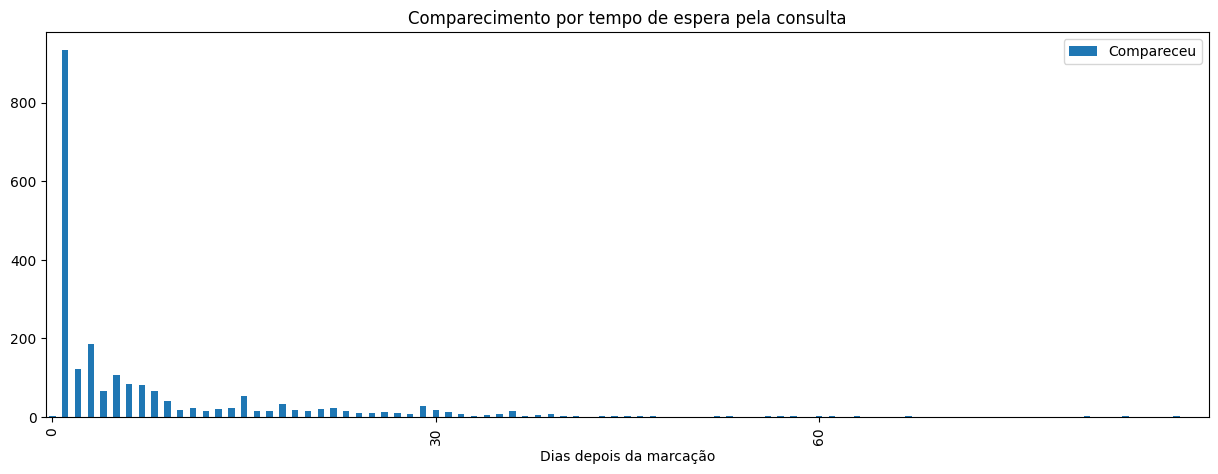

In [49]:
df_pcd.pivot_table(index='time_delta', aggfunc='count', values='Compareceu').plot(kind='bar', xticks= (np.arange(0,61,30)),figsize=(15,5), title = 'Comparecimento por tempo de espera pela consulta', xlabel = 'Dias depois da marcação')

#### Solução: Quanto mais cedo as consultas forem marcadas, e tendo sido reforçados os lembretes por sms, a taxa de AUSÊNCIA do grupo PCD diminuirá.

# Análise do tempo entre a marcação da consulta e a consulta em si

- Felipe Cunha

### Hipóteses e pontos a serem investigados: 
- Uma parte das consultas foi marcada para o mesmo dia e a taxa de comparecimento deve ser mais alta;
- Quanto maior a diferença de tempo entre a marcação da consulta e a consulta, maior a taxa de ausentes;
- Quanto maior a diferença de tempo, mais as pessoas recebem SMS para lembrar da consulta;
    - E nesse caso, o recebimento de SMS faz com que aumente a taxa de presença?
- Verificar também as outras variáveis em relação a faixas de intervalo de tempo

### Análise das consultas marcadas para o mesmo dia

In [10]:
# Verificando quantas consultas foram marcadas para o mesmo dia e criando um dataframe com essas consultas
consultas_mesmo_dia = df['time_delta'].value_counts()[0]
total_consultas = len(df['time_delta'])

df_dia0 = df[df['time_delta'] == 0]
df_dia0['Compareceu'].value_counts()

print(f'Total de consultas marcadas para o mesmo dia: {consultas_mesmo_dia}.')
print(f'Total de consultas: {total_consultas}.')
print('\nRelação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):')
print(df_dia0['Compareceu'].value_counts())
print(f'\nFormato do novo DataFrame: Linhas: {df_dia0.shape[0]}, Colunas: {df_dia0.shape[1]}')

Total de consultas marcadas para o mesmo dia: 38587.
Total de consultas: 110573.

Relação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):
1    36795
0     1792
Name: Compareceu, dtype: int64

Formato do novo DataFrame: Linhas: 38587, Colunas: 15


In [11]:
presenca_dia0 = df_dia0['Compareceu'].value_counts()[1] # Relação de pessoas que foram a consulta
ausencia_dia0 = df_dia0['Compareceu'].value_counts()[0] # Relação de pessoas que não foram a consulta

print(f'Percentual de consultas marcadas para o mesmo dia: {consultas_mesmo_dia/total_consultas*100:.2f}%.')
print(f'Percentual de presença nessas consultas: {presenca_dia0/len(df_dia0)*100:.2f}%.')

Percentual de consultas marcadas para o mesmo dia: 34.90%.
Percentual de presença nessas consultas: 95.36%.


In [12]:
df_dia0.groupby('Compareceu').mean() # Panorama geral dos dados para as consultas marcadas no mesmo dia

C:\Users\felip\AppData\Local\Temp\ipykernel_6664\2605397951.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dia0.groupby('Compareceu').mean() # Panorama geral dos dados para as consultas marcadas no mesmo dia


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta
Compareceu,,,,,,,,,,
0,1.482995e+14,5.709346e+06,28.415281,0.136719,0.131696,0.049107,0.031250,0.039621,0.0,0.0
1,1.518766e+14,5.713338e+06,34.751927,0.107216,0.177660,0.067400,0.040277,0.023427,0.0,0.0


##### Conclusões
- Concluí-se que nesse tipo de consulta a taxa de comparecimento é bem alta (> 95%);
- A média de idade para quem compareceu é de 35 anos, um pouco maior que a das pessoas que não compareceram (28 anos);
- Fatores como receber ou não o bolsa família, doenças pré-existentes não parecem influenciar na presença ou ausência nas consultas;

### Análise do restante dos dados, consultas com 1 ou mais dias de intervalo entre a marcação e a consulta

In [23]:
df_sem_dia0 = df[df['time_delta'] > 0] # criando o dataframe
df_sem_dia0.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.00000,REPÚBLICA,0,1,0,0,0,0,1,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.00000,GOIABEIRAS,0,0,0,0,0,0,0,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39.00000,GOIABEIRAS,0,0,0,0,0,0,0,2
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.00000,CONQUISTA,0,0,0,0,0,0,1,2
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,37.09195,NOVA PALESTINA,0,0,0,0,0,0,1,2


In [24]:
# Verificando quantas consultas foram marcadas com mais de um dia de intervalo e criando um dataframe com essas consultas
consultas_mais_1dia = len(df_sem_dia0)

print(f'Total de consultas marcadas com um ou mais de um dia de intervalo: {consultas_mais_1dia}.')
print(f'Total de consultas: {total_consultas}.')
print('\nRelação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):')
print(df_sem_dia0['Compareceu'].value_counts())
print(f'\nFormato do novo DataFrame: Linhas: {df_sem_dia0.shape[0]}, Colunas: {df_sem_dia0.shape[1]}')

Total de consultas marcadas com um ou mais de um dia de intervalo: 71981.
Total de consultas: 110573.

Relação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):
1    51454
0    20527
Name: Compareceu, dtype: int64

Formato do novo DataFrame: Linhas: 71981, Colunas: 15


In [25]:
presenca_sem_dia0 = df_sem_dia0['Compareceu'].value_counts()[1] # Relação de pessoas que foram a consulta

print(f'Percentual de consultas marcadas para um intervalo de tempo maior que um dia: {consultas_mais_1dia/total_consultas*100:.2f}%.')
print(f'Percentual de presença nessas consultas: {presenca_sem_dia0/len(df_sem_dia0)*100:.2f}%.')

Percentual de consultas marcadas para o mesmo dia: 65.10%.
Percentual de presença nessas consultas: 71.48%.


##### Percebe-se uma queda em mais de 20% para consultas agendadas para dias posteriores. 
---
##### Em seguida foi verificado o comportamento da variável relativa ao intervalo de tempo

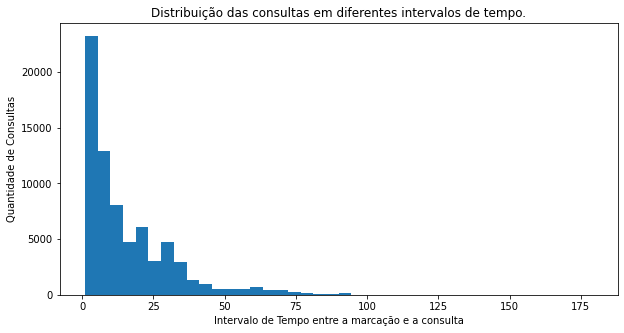

In [41]:
plt.figure(figsize=(10,5))
plt.hist(df_sem_dia0['time_delta'], bins=40) # histograma para ver a distribuição dos dados
plt.xlabel('Intervalo de Tempo entre a marcação e a consulta')
plt.ylabel('Quantidade de Consultas')
plt.title('Distribuição das consultas em diferentes intervalos de tempo.')
plt.show()

- A partir do histograma, percebeu-se que a maioria das consultas estava concentrada em um intervalo de tempo de até 40 dias. 
- Em seguida foi verificado se haviam outliers para essa série de dados

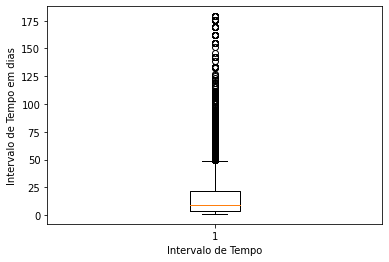

In [47]:
plt.boxplot(df_sem_dia0['time_delta']) # boxplot para verificar a presença de outliers
plt.xlabel('Intervalo de Tempo')
plt.ylabel('Intervalo de Tempo em dias')
plt.show()

In [33]:
q_high = df_sem_dia0['time_delta'].quantile(0.95) # Cálculo do limite máximo para retirada dos outliers em 95% de confiança
q_high

48.0

- Optou-se por retirar as consultas marcadas no mesmo dia e as com mais de 48 dias de intervalo para se fazer um estudo

In [34]:
df_filtrado = df_sem_dia0[df_sem_dia0['time_delta'] < q_high] # criação do novo dataframe filtrado, sem outliers
df_filtrado.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.00000,REPÚBLICA,0,1,0,0,0,0,1,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.00000,GOIABEIRAS,0,0,0,0,0,0,0,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39.00000,GOIABEIRAS,0,0,0,0,0,0,0,2
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.00000,CONQUISTA,0,0,0,0,0,0,1,2
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,37.09195,NOVA PALESTINA,0,0,0,0,0,0,1,2


In [36]:
print(f'Formato do DF com outliers: Linhas: {df_sem_dia0.shape[0]}, Colunas: {df_sem_dia0.shape[1]}')
print(f'Formato do DF sem outliers: Linhas: {df_filtrado.shape[0]}, Colunas: {df_filtrado.shape[1]}')
print(f'Foram retiradas {df_sem_dia0.shape[0] - df_filtrado.shape[0]} consultas.')

Formato do DF com outliers: Linhas: 71981, Colunas: 15
Formato do DF sem outliers: Linhas: 68336, Colunas: 15
Foram retiradas 3645 consultas.


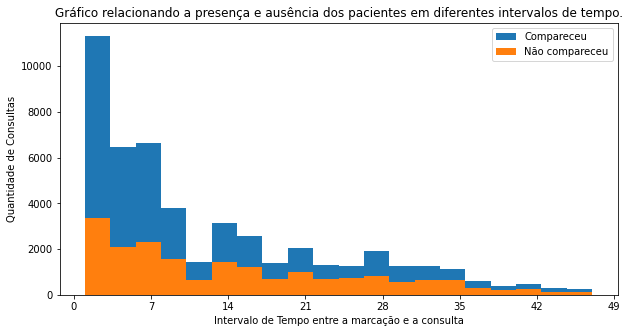

In [38]:
# cálculo do total de pessoas que compareceram e das que não compareceram 
compareceu = df_filtrado[df_filtrado['Compareceu'] == 1]['time_delta']
n_compareceu = df_filtrado[df_filtrado['Compareceu'] == 0]['time_delta']

plt.figure(figsize=(10,5))
plt.hist(compareceu, bins=20, label='Compareceu')
plt.hist(n_compareceu, bins=20, label='Não compareceu')
plt.xlabel('Intervalo de Tempo entre a marcação e a consulta')
plt.ylabel('Quantidade de Consultas')
plt.title('Gráfico relacionando a presença e ausência dos pacientes em diferentes intervalos de tempo.')
plt.xticks(np.arange(0, 50, 7))
plt.legend()
plt.show()

- Percebe-se que a partir de um intervalo de tempo ~14 dias, ocorre uma maior taxa de ausentes às consultas. 

In [75]:
df_filtrado.groupby('Compareceu').mean() # consultas com 1 ou mais dias de intervalo de tempo

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta
Compareceu,,,,,,,,,,
0,1.464457e+14,5.657389e+06,34.567194,0.116293,0.170914,0.065431,0.031351,0.016422,0.470940,14.467851
1,1.444385e+14,5.668006e+06,39.558777,0.086781,0.224569,0.079013,0.024000,0.019033,0.491291,12.362601


In [78]:
df_mais14 = df_filtrado[df_filtrado['time_delta'] >= 14] # consultas só com mais de 14 dias
df_mais14.groupby('Compareceu').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta
Compareceu,,,,,,,,,,
0,1.499885e+14,5.621023e+06,32.341602,0.115346,0.139067,0.048342,0.026757,0.013153,0.551209,24.955818
1,1.447641e+14,5.626526e+06,36.855872,0.087681,0.184681,0.057296,0.020735,0.015220,0.629205,24.685563


- Nesses conjuntos analisados, percebe-se que a média de idades dos faltantes é menor do que a de pessoas que compareceram às consultas (em torno de 10% menores).
---
- Por fim, analisou-se apenas os "outliers", ou seja, consultas com mais de 48 dias entre a marcação e a consulta em si

In [48]:
df_filtrado_2 = df_sem_dia0[df_sem_dia0['time_delta'] >= q_high] # criação do novo dataframe filtrado só dos outliers
df_filtrado_2.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta
285,6.342844e+10,5430959,F,2016-03-04,2016-04-29,20.0,SANTA MARTHA,0,0,0,0,0,0,1,56
475,9.639166e+11,5452612,M,2016-03-10,2016-04-29,20.0,SÃO PEDRO,0,0,0,0,0,1,0,50
476,4.414826e+13,5408325,F,2016-02-29,2016-04-29,32.0,NOVA PALESTINA,0,0,0,0,0,1,0,60
696,6.441189e+14,5441632,F,2016-03-08,2016-04-29,69.0,JESUS DE NAZARETH,0,1,1,0,0,0,1,52
698,3.174757e+13,5435044,F,2016-03-07,2016-04-29,38.0,JESUS DE NAZARETH,0,0,0,1,0,1,0,53


In [50]:
print(f'Formato do DF com outliers: Linhas: {df_filtrado_2.shape[0]}, Colunas: {df_filtrado_2.shape[1]}')

Formato do DF com outliers: Linhas: 3645, Colunas: 15


In [51]:
df_filtrado_2.groupby('Compareceu').mean() # consultas com 1 ou mais dias de intervalo de tempo

C:\Users\felip\AppData\Local\Temp\ipykernel_6664\3285286524.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filtrado_2.groupby('Compareceu').mean() # consultas com 1 ou mais dias de intervalo de tempo


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta
Compareceu,,,,,,,,,,
0,1.497573e+14,5.470031e+06,39.645890,0.066847,0.196929,0.064137,0.010840,0.015357,0.578139,65.416441
1,1.505914e+14,5.468331e+06,47.808511,0.036643,0.202916,0.067376,0.010638,0.016548,0.661939,66.139086


In [68]:
f2_comparecimento = len(df_filtrado_2[df_filtrado_2['Compareceu'] == 1])

print(f'Percebe-se uma taxa de comparecimento nessas consultas de: {(f2_comparecimento/len(df_filtrado_2)*100):.2f}%.')

Percebe-se uma taxa de comparecimento nessas consultas de: 69.63%.


- Por fim, concluí-se que: 
    - As pessoas vão mais às consultas marcadas para o mesmo dia (~95%);
    - Essa taxa possui uma **tendência de queda** com o __aumento do intervalo de tempo__ entre a marcação e a consulta;
    - Para consultas com mais de **14 dias**, há uma **contribuição maior** do recebimento de SMS como alerta;
    - Em geral, a média de idade das pessoas que comparecem às consultas é maior;
    - Há uma tendência de usuários do bolsa família faltarem mais às consultas; 
    - Fatores como deficiência não parecem influenciar no comparecimento ou não às consultas.